In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
train = np.loadtxt(fname = "C:\\Users\\Spencer\\Downloads\\in.dta.txt")

In [161]:
test = np.loadtxt(fname = "C:\\Users\\Spencer\\Downloads\\out.dta.txt")

In [162]:
def nonlinear_transformation_regression(training_pts, labels):
    missclassified = 0
    transformed_pts = np.asarray(nonlinear_transform(training_pts))
    pseudo_inverse = np.linalg.pinv(transformed_pts)
    y = np.asarray(labels)
    w = np.matmul(pseudo_inverse, y)
    for i in range(len(pts)):
        if np.sign(w.dot(transformed_pts[i])) != labels[i]:
            missclassified += 1
    return (w, missclassified / len(pts)) 

In [163]:
def regression_with_decay(training_pts, labels, k):
    missclassified = 0
    transformed_pts = np.asarray(nonlinear_transform(training_pts))
    pseudo_inverse = np.linalg.pinv(transformed_pts)
    y = np.asarray(labels)
    col = transformed_pts.shape[1]
    inner_term = np.linalg.inv((np.matmul(transformed_pts.T, transformed_pts) + 10**k * np.identity(col)))
    x = np.matmul(transformed_pts.T, transformed_pts)
    intermed = np.matmul(inner_term, transformed_pts.T)
    w = np.matmul(intermed, y)
    for i in range(len(pts)):
        if np.sign(w.dot(transformed_pts[i])) != labels[i]:
            missclassified += 1
    return (w, missclassified / len(pts)) 

In [164]:
def nonlinear_transform(pts):
    transformation = []
    for pt in pts:
        x1 = pt[0]
        x2 = pt[1]
        transformation.append([1, x1, x2, x1 ** 2, x2 ** 2, x1 * x2, abs((x1 - x2)), abs((x1 + x2))])
    return transformation

In [165]:
y = []
for i in range(len(train)):
    y.append(train[i][2])

In [166]:
pts = []
for i in range(len(train)):
    pts.append((train[i][0], train[i][1]))

In [167]:
out_labels = []
for i in range(len(test)):
    out_labels.append(test[i][2])

In [168]:
test_pts = []
for i in range(len(test)):
    test_pts.append((test[i][0], test[i][1]))

Problem 2

In [169]:
e_in = 0
w = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = nonlinear_transformation_regression(pts, y)
e_in += x[1]
w += x[0]
(e_in, w)

(0.02857142857142857,
 array([-1.64706706, -0.14505927,  0.10154121, -2.03296844, -1.82804373,
         2.48152945,  4.15893861,  0.31651714]))

In [170]:
e_out = 0
missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out = missclassified / len(test_pts)
e_out

0.084

Problem 3

In [171]:
e_in_decay_small = 0
w_decay_small = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, -3)
e_in_decay_small += x[1]
w_decay_small += x[0]
(e_in_decay_small, w_decay_small)

(0.02857142857142857,
 array([-1.6432827 , -0.14333537,  0.10144329, -2.02456533, -1.81721505,
         2.45550685,  4.14009201,  0.31960135]))

In [172]:
missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_small.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_small = missclassified / len(test_pts)
e_out_decay_small

0.08

Problem 4

In [173]:
e_in_decay_big = 0
w_decay_big = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, 3)
e_in_decay_big += x[1]
w_decay_big += x[0]
(e_in_decay_big, w_decay_big)

(0.37142857142857144,
 array([ 0.00435688, -0.00134416,  0.0024939 ,  0.00328695,  0.00484127,
        -0.00862023,  0.01786706, -0.00490192]))

In [174]:
missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_big.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_big = missclassified / len(test_pts)
e_out_decay_big

0.436

Problem 5

In [175]:
w_decay_2 = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, 2)
w_decay_2 += x[0]
(w_decay_2)

w_decay_1 = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, 1)
w_decay_1 += x[0]
(w_decay_1)

w_decay_0 = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, 0)
w_decay_0 += x[0]
(w_decay_0)

w_decay_neg1 = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, -1)
w_decay_neg1 += x[0]
(w_decay_neg1)

w_decay_neg2 = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
x = regression_with_decay(pts, y, -2)
w_decay_neg2 += x[0]
(w_decay_neg2)

missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_2.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_2 = missclassified / len(test_pts)

missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_1.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_1 = missclassified / len(test_pts)

missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_0.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_0 = missclassified / len(test_pts)

missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_neg1.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_neg1 = missclassified / len(test_pts)

missclassified = 0
transformed = np.asarray(nonlinear_transform(test_pts))
for i in range(len(test_pts)):
    if np.sign(w_decay_neg2.dot(transformed[i])) != out_labels[i]:
        missclassified += 1
e_out_decay_neg2 = missclassified / len(test_pts)

(e_out_decay_2, e_out_decay_1, e_out_decay_0, e_out_decay_neg1, e_out_decay_neg2)

(0.228, 0.124, 0.092, 0.056, 0.084)

Problem 6

[0.084, 0.084, 0.08, 0.084, 0.056, 0.092, 0.124, 0.228, 0.436, 0.452, 0.456]

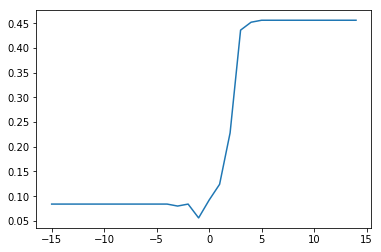

In [176]:
l = [i for i in np.arange(-15,15,1, dtype=float)]
out = []
for i in range(30):
    w_decay = np.asarray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    x = regression_with_decay(pts, y, l[i])
    w_decay += x[0]
    
    missclassified = 0
    transformed = np.asarray(nonlinear_transform(test_pts))
    for i in range(len(test_pts)):
        if np.sign(w_decay.dot(transformed[i])) != out_labels[i]:
            missclassified += 1
    e_out_decay = missclassified / len(test_pts)
    out.append(e_out_decay) 
plt.plot(l, out)
out[10:21]